## Random Forest - Credit Default Prediction

### Data Understanding and Cleaning

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv('credit-card-default.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In [7]:
df.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
defaulted    0
dtype: int64

In [8]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In this case, we know that there are no major data quality issues, so we'll go ahead and build the model.

### Data Preparation and Model Building

In [3]:
# Importing test_train_split from sklearn library
from sklearn.model_selection import train_test_split

In [4]:
# Putting feature variable to X
X = df.drop('defaulted',axis=1)

# Putting response variable to y
y = df['defaulted']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

#### Default Hyperparameters
Let's first fit a random forest model with default hyperparameters.

In [5]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc =RandomForestClassifier()

In [14]:
# Fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [15]:
# Making predictions
pred=rfc.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [17]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [17]:
# Let's check the report of our default model
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7058
           1       0.64      0.36      0.46      1942

    accuracy                           0.82      9000
   macro avg       0.74      0.65      0.67      9000
weighted avg       0.80      0.82      0.80      9000



In [18]:
# Printing confusion matrix
print(confusion_matrix(y_test,pred))

[[6674  384]
 [1252  690]]


In [20]:
print(accuracy_score(y_test,pred))

0.8182222222222222


So far so good, let's now look at the list of hyperparameters which we can tune to improve model performance.

### Hyperparameter Tuning

The following hyperparameters are present in a random forest classifier. Note that most of these hypereparameters are actually of the decision trees that are in the forest.


- **n_estimators**: integer, optional (default=10): The number of trees in the forest.
- **criterion**: string, optional (default=”gini”)The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. Note: this parameter is tree-specific.
- **max_features** : int, float, string or None, optional (default=”auto”)The number of features to consider when looking for the best split:
    - If int, then consider max_features features at each split.
    - If float, then max_features is a percentage and int(max_features * n_features) features are considered at each split.
    - If “auto”, then max_features=sqrt(n_features).
    - If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).
    - If “log2”, then max_features=log2(n_features).
    - If None, then max_features=n_features.
    - Note: the search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than max_features features.
- **max_depth** : integer or None, optional (default=None)The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
- **min_samples_split** : int, float, optional (default=2)The minimum number of samples required to split an internal node:**
    - **If int, then consider min_samples_split as the minimum number.
    - **If float, then min_samples_split is a percentage and ceil(min_samples_split, n_samples) are the minimum number of samples for each split.
- **min_samples_leaf** : int, float, optional (default=1)The minimum number of samples required to be at a leaf node:**
    - **If int, then consider min_samples_leaf as the minimum number.**
    - **If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.**
- **min_weight_fraction_leaf** : float, optional (default=0.)The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.
- **max_leaf_nodes** : int or None, optional (default=None)Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
- **min_impurity_split** : float,Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.


### Tuning max_depth

Let's try to find the optimum values for ```max_depth``` and understand how the value of max_depth impacts the overall accuracy of the ensemble.


In [24]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold,GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters={"max_depth":range(2,20,5)}

# instantiate the model
rf = RandomForestClassifier()

# fit tree on training data
rf =GridSearchCV(rf,parameters, cv=n_folds,scoring="accuracy",return_train_score=True)
rf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [27]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.800894,0.143027,0.062962,0.003403,2,{'max_depth': 2},0.801667,0.802381,0.801190,0.793095,...,0.799238,0.003442,4,0.798869,0.799226,0.799107,0.799881,0.800893,0.799595,0.000730
1,4.026526,0.114913,0.102737,0.021474,7,{'max_depth': 7},0.816905,0.821429,0.816667,0.815952,...,0.816905,0.002551,2,0.832857,0.830952,0.831250,0.834762,0.833036,0.832571,0.001376
2,6.851249,0.918304,0.155889,0.037746,12,{'max_depth': 12},0.815238,0.819762,0.819048,0.812857,...,0.817333,0.002799,1,0.884167,0.885714,0.884583,0.887083,0.886726,0.885655,0.001145
3,7.644878,0.548256,0.158414,0.005996,17,{'max_depth': 17},0.812619,0.817619,0.821905,0.810714,...,0.816048,0.003969,3,0.927024,0.930000,0.929167,0.930417,0.928452,0.929012,0.001203


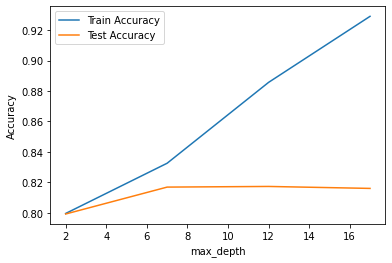

In [30]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"],
        scores["mean_train_score"],
        label="Train Accuracy")
plt.plot(scores["param_max_depth"],
        scores["mean_test_score"],
        label="Test Accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

You can see that as we increase the value of max_depth, both train and test scores increase till a point, but after that test score starts to decrease. The ensemble tries to overfit as we increase the max_depth.

Thus, controlling the depth of the constituent trees will help reduce overfitting in the forest.

### Tuning n_estimators i.e no. of trees in the random forest

Let's try to find the optimum values for n_estimators and understand how the value of n_estimators impacts the overall accuracy. Notice that we'll specify an appropriately low value of max_depth, so that the trees do not overfit.

In [35]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {"n_estimators":range(100,1500,400)}

# instantiate the model (note we are specifying a max_depth)

#rf = RandomForestClassifier(max_depth=7)
#(but it staking lot of tym so i change it to 7 to 4)

rf = RandomForestClassifier(max_depth=4)

# fit tree on training data
rf =GridSearchCV(rf,parameters,cv=n_folds, scoring="accuracy",return_train_score=True)
rf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_s

In [36]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.599771,0.091129,0.072608,0.002697,100,{'n_estimators': 100},0.812143,0.814762,0.811190,0.805714,...,0.810476,0.003097,1,0.811905,0.810417,0.812917,0.813988,0.812500,0.812345,0.001180
1,13.235988,0.846332,0.369831,0.019698,500,{'n_estimators': 500},0.811905,0.814286,0.811429,0.805000,...,0.810143,0.003242,2,0.811012,0.810357,0.811548,0.812321,0.812381,0.811524,0.000774
2,26.887651,3.326736,0.776827,0.101387,900,{'n_estimators': 900},0.810952,0.814048,0.811190,0.805714,...,0.809619,0.003189,4,0.810893,0.810357,0.811310,0.812560,0.812738,0.811571,0.000932
3,35.126306,0.995968,1.141208,0.178660,1300,{'n_estimators': 1300},0.811667,0.814048,0.811429,0.805238,...,0.809905,0.003225,3,0.811071,0.810417,0.811964,0.812381,0.812381,0.811643,0.000778


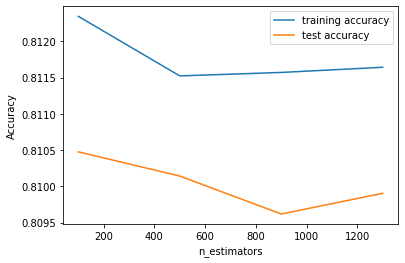

In [37]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning max_features

Let's see how the model performance varies with ```max_features```, which is the maximum numbre of features considered for splitting at a node.

In [39]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_s

In [40]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.771652,0.216715,0.092771,0.019293,4,{'max_features': 4},0.812619,0.813810,0.810714,0.804048,...,0.810000,0.003427,5,0.811607,0.809940,0.811964,0.811964,0.813095,0.811714,0.001019
1,4.428336,0.103950,0.078957,0.002447,8,{'max_features': 8},0.818095,0.821667,0.821190,0.817143,...,0.819190,0.001860,1,0.821607,0.820238,0.820952,0.821786,0.822262,0.821369,0.000704
2,7.650315,0.516292,0.081659,0.007980,14,{'max_features': 14},0.817857,0.821190,0.818571,0.816905,...,0.818667,0.001425,4,0.822738,0.821190,0.821667,0.822738,0.822202,0.822107,0.000607
3,11.224547,0.769844,0.083150,0.006936,20,{'max_features': 20},0.818095,0.821429,0.819286,0.817381,...,0.818810,0.001452,3,0.822619,0.821071,0.822083,0.822381,0.821726,0.821976,0.000542
4,13.583460,1.346179,0.092944,0.025297,24,{'max_features': 24},0.818333,0.821667,0.819762,0.817143,...,0.819095,0.001531,2,0.823155,0.821012,0.822024,0.822798,0.822321,0.822262,0.000736


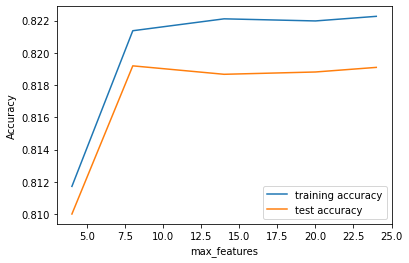

In [41]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Apparently, the training and test scores both seem to increase as we increase max_features, and the model doesn't seem to overfit more with increasing max_features. Think about why that might be the case.

### Tuning min_samples_leaf

The hyperparameter **min_samples_leaf** is the minimum number of samples required to be at a leaf node:
- If int, then consider min_samples_leaf as the minimum number.
- If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

Let's now check the optimum value for min samples leaf in our case.


In [43]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [44]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,5.350016,0.458545,0.140115,0.040101,100,{'min_samples_leaf': 100},0.812857,0.819048,0.818810,0.811429,...,0.814905,0.003318,1,0.815774,0.817917,0.818810,0.818155,0.818452,0.817821,0.001067
1,4.944442,0.387272,0.122125,0.026172,150,{'min_samples_leaf': 150},0.812857,0.818571,0.810714,0.804762,...,0.811190,0.004548,2,0.813095,0.818750,0.810179,0.813214,0.814345,0.813917,0.002782
2,4.434476,0.206510,0.114331,0.018992,200,{'min_samples_leaf': 200},0.815952,0.811190,0.808810,0.804524,...,0.809429,0.003943,3,0.815536,0.809226,0.808155,0.811488,0.811310,0.811143,0.002532
3,4.654820,0.859850,0.116869,0.010368,250,{'min_samples_leaf': 250},0.810952,0.810000,0.809524,0.805000,...,0.808143,0.002513,4,0.808690,0.807560,0.810357,0.810179,0.808988,0.809155,0.001028
4,3.925254,0.174416,0.116130,0.028557,300,{'min_samples_leaf': 300},0.808333,0.810000,0.805952,0.804762,...,0.807095,0.001853,5,0.807917,0.807917,0.806905,0.809345,0.810417,0.808500,0.001234


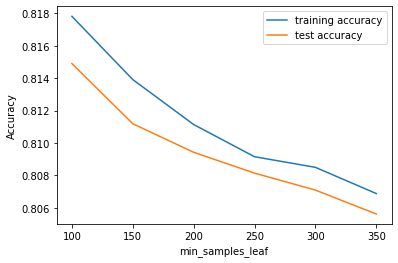

In [45]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

You can see that the model starts of overfit as you decrease the value of min_samples_leaf.

### Tuning min_samples_split

Let's now look at the performance of the ensemble as we vary min_samples_split.

In [46]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [47]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,6.923142,0.814295,0.132130,0.004956,200,{'min_samples_split': 200},0.818095,0.822143,0.821667,0.817857,...,0.819667,0.001848,1,0.824286,0.823274,0.824167,0.824167,0.823333,0.823845,0.000445
1,6.745527,0.405055,0.131014,0.002532,250,{'min_samples_split': 250},0.817619,0.821905,0.821190,0.815238,...,0.818810,0.002447,3,0.822619,0.821726,0.822619,0.823036,0.823512,0.822702,0.000589
2,6.423820,0.141965,0.140430,0.020086,300,{'min_samples_split': 300},0.818810,0.822143,0.821905,0.815476,...,0.819095,0.002614,2,0.821488,0.821667,0.822440,0.821488,0.821488,0.821714,0.000370
3,6.043636,0.099029,0.144584,0.034578,350,{'min_samples_split': 350},0.817619,0.821190,0.821429,0.814048,...,0.818571,0.002698,5,0.820714,0.820357,0.821250,0.821488,0.821548,0.821071,0.000463
4,5.875954,0.204127,0.120037,0.002709,400,{'min_samples_split': 400},0.815714,0.820714,0.820714,0.815952,...,0.818095,0.002213,6,0.819048,0.818750,0.820000,0.820833,0.821190,0.819964,0.000957


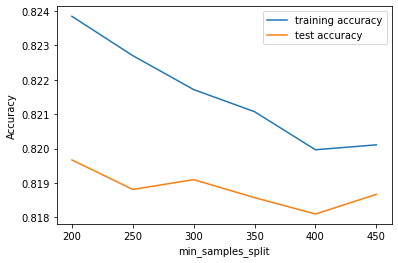

In [48]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Grid Search to Find Optimal Hyperparameters

We can now find the optimal hyperparameters using GridSearchCV.

In [6]:
from sklearn.model_selection import KFold,GridSearchCV

In [8]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search =GridSearchCV(rf,param_grid=param_grid,cv=3,n_jobs = -1,verbose = 1,return_train_score=True)

In [9]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 14.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [10]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8184285714285714 using {'max_depth': 4, 'max_features': 10, 'min_samples_leaf': 300, 'min_samples_split': 400, 'n_estimators': 100}


**Fitting the final model with the best parameters obtained from grid search.**

In [11]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=100)

In [12]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [13]:
# predict
predictions = rfc.predict(X_test)

In [14]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [15]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      7058
           1       0.70      0.35      0.47      1942

    accuracy                           0.83      9000
   macro avg       0.77      0.66      0.68      9000
weighted avg       0.81      0.83      0.81      9000



In [16]:
print(confusion_matrix(y_test,predictions))

[[6763  295]
 [1253  689]]


In [18]:
accuracy_score(y_test,predictions)

0.828